# Predicting Board Game Reviews
[BoardGameGeek](http://www.boardgamegeek.com) is a popular site where board games are discussed and reviewed.

## 1: Introduction To The Data Set
For this project, we will be working with a data set that contains 80000 board games and their associated review scores. The data was scraped from BoardGameGeek and compiled into CSV format by [Sean Beck](https://github.com/ThaWeatherman). The data set is stored in board_games.csv, and can be downloaded [here](https://github.com/ThaWeatherman/scrapers/blob/master/boardgamegeek/games.csv). 

Each row represents a single board game, and has descriptive statistics about the board game, as well as review information. 

Here are some of the interesting columns:
* `name`: name of the board game.
* `playingtime`: the playing time (given by the manufacturer).
* `minplaytime`: the minimum playing time (given by the manufacturer).
* `maxplaytime`: the maximum playing time (given by the manufacturer).
* `minage`: the minimum recommended age to play.
* `users_rated`: the number of users who rated the game.
* `average_rating`: the average rating given to the game by users. (0-10)
* `total_weights`: Number of weights given by users.
* `average_weight`: the average of all the subjective weights (0-5).

We will aim to create a machine learning model to predict `average_rating` using the other columns. The data set contains quite a few missing values, and rows where there are no reviews. We will remove these as we explore the data.

* Read the `board_games.csv` data set into a Dataframe called `board_games`.
* Display the dataframe columns with data types.
* Display the first few rows of `board_games` and get familiar with the data set.
* Remove rows containing missing values.
* Remove any rows that have no reviews.

-----


In [2]:
import pandas as pd
board_games = pd.read_csv("data/board_games.csv")

print(board_games.dtypes)
print()

id                        int64
type                     object
name                     object
yearpublished           float64
minplayers              float64
maxplayers              float64
playingtime             float64
minplaytime             float64
maxplaytime             float64
minage                  float64
users_rated               int64
average_rating          float64
bayes_average_rating    float64
total_owners              int64
total_traders             int64
total_wanters             int64
total_wishers             int64
total_comments            int64
total_weights             int64
average_weight          float64
dtype: object



In [3]:
print(board_games.head())
print()

       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0

In [7]:
print(board_games.shape)
print()

(81312, 20)



In [11]:
board_games.dropna(axis=0, inplace=True)
print(board_games.shape)
print()

(56894, 20)



In [13]:
board_games = board_games[board_games["users_rated"] > 0]
print(board_games.shape)
print(board_games.head())

(56894, 20)
       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        1

In [14]:
print(board_games.describe().transpose())
print()

                        count          mean           std     min       25%  \
id                    56894.0  64092.223943  57513.253779     1.0  16133.25   
yearpublished         56894.0   1874.793089    486.032042 -3500.0   1989.00   
minplayers            56894.0      2.004834      0.791475     0.0      2.00   
maxplayers            56894.0      5.572837     50.773395     0.0      2.00   
playingtime           56894.0     59.921503    406.451917     0.0     15.00   
minplaytime           56894.0     57.457184    393.197450     0.0     15.00   
maxplaytime           56894.0     59.921503    406.451917     0.0     15.00   
minage                56894.0      7.591556      4.869533     0.0      4.00   
users_rated           56894.0    231.360477   1364.124459     1.0      2.00   
average_rating        56894.0      6.016113      1.578830     1.0      5.00   
bayes_average_rating  56894.0      1.654372      2.646445     0.0      0.00   
total_owners          56894.0    374.507470   1787.0


* The original data set has 81312 rows.
* After dropping the rows with missing values and missing reviews, the dataframe contains 56894 rows.
-----

## 2: Picking An Error Metric
We will attempt predicting the `average_rating` column using the other columns.
We will need to do some data exploration before that to help us understand the distribution of `average_rating` better, as well as select an **error metric** that we will use to evaluate the performance of the machine learning model.

* Generate a histogram of the average ratings.
* Generate a box and whisker plot of the average ratings.
* Calculate the standard deviation.
* Calculating the mean.

Determine the error metric that might make sense for this data.


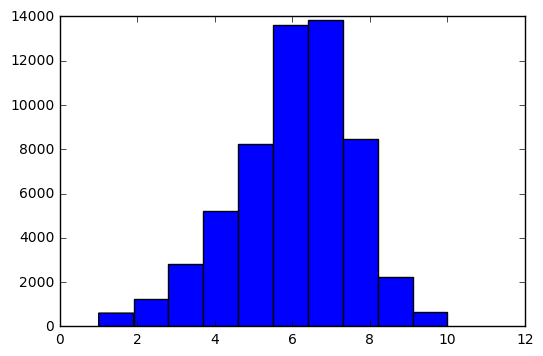

In [15]:
import matplotlib.pyplot as plt
plt.hist(board_games["average_rating"])
plt.show()

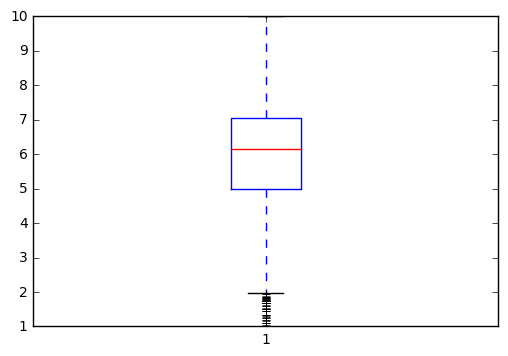

In [17]:
plt.boxplot(board_games["average_rating"])
plt.show()

-----
Calculate the standard deviation.

In [18]:
import numpy as np
print(np.std(board_games["average_rating"]))

1.5788160595839211


-----
Calculating the mean.

In [19]:
print(np.mean(board_games["average_rating"]))

6.016112849333889


In this data set, using **_mean squared error_** as an error metric makes sense.  This is because the data is continuous, and follows a somewhat normal distribution.  We'll be able to compare our error to the standard deviation to see how good the model is at predictions.

---

## 3: Plotting Clusters
We will look for patterns that may help to develop a machine learning model. 
We will use a clustering algorithm to create clusters, then plot them out. 

First use the sklearn.cluster.KMeans class to fit a k-means clustering model. This class only works with numeric columns, so we will extract the numeric columns of `board_games` before passing them into the KMeans.fit() method.

To visualize how board games are clustered, we can calculate the row means and row standard deviations and then generate a scatter plot that compares the means against the standard deviations.


* Use the `KMeans` class to create clusters.
  * Initialize the `KMeans` class with 5 clusters.
  * Extract the numeric columns of board_games, and assign to the variable `numeric_columns`.
    * Leave out `name`, `type`, and `id`.
  * Fit the `KMeans` class to `numeric_columns` using the `fit` method.
  * Extract the `labels_` attribute of the `KMeans` class, and assign to the variable `labels`.
* Plot out the cluster assignments.
  * Find the mean of each row. Assign the result to `game_mean`.
  * Find the standard deviation of each row. Assign the result to `game_std`.
  * Create a plot using the matplotlib `scatter` function, with the `c` keyword argument set to `labels`, the keyword argument `x` set to `game_mean`, and the keyword argument `y` set to `game_std`.

In [23]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1)
#print(list(board_games))
numeric_columns = ['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 
                   'users_rated', 'average_rating', 'bayes_average_rating', 'total_owners', 'total_traders', 
                   'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']
distances = kmeans_model.fit_transform(board_games[numeric_columns])
labels = kmeans_model.labels_
print(distances[0:5])

[[  34270.32024043   15515.75080653   23212.00318112   29034.55646449
   109239.51960278]
 [  22863.02928513    5452.66725998   35033.39527854   17733.51036971
   106312.37310857]
 [  16344.41370792    4888.37318413   41586.75357124   11292.41334578
   105049.99688662]
 [  20424.37995657    3573.13417363   37216.55936336   15292.65450822
   105609.78133475]
 [  60671.68052148   41952.63884198    5691.39402261   55484.43932957
   120248.90412433]]


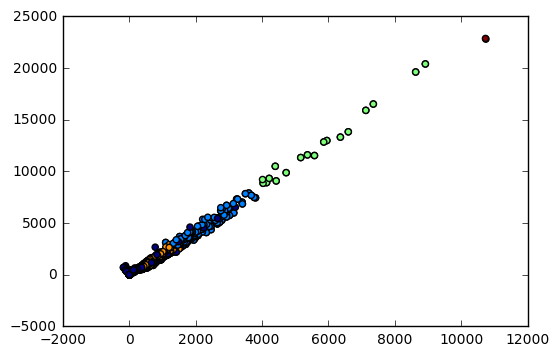

In [21]:
game_mean = board_games[numeric_columns].apply(np.mean, axis=1)
game_std = board_games[numeric_columns].apply(np.std, axis=1)
plt.scatter(game_mean, game_std, c=labels)
plt.show()

It looks like most of the games are similar, but as the game attributes tend to increase in value (such as number of users who rated), there are fewer high quality games.  So most games don't get played much, but a few get a lot of players.

## 4: Finding Correlations
We can figure out which columns correlate well with average_rating. This will enable us to remove columns that don't add much predictive power to the model. It will also enable us to remove columns that are derived from the target, or otherwise cause overfitting.

* Compute pairwise correlations between only the numeric columns. Assign the result to `correlations`.
* Display the `average_rating` column of `correlations`, which shows how much the other columns correlate with the `average_rating` column.
* Remove any columns that seem to be derived from the `average_rating`. The `bayes_average_rating` is an example of this.
* Remove any columns that don't seem to correlate at all with the `average_rating` column.

In [24]:
correlations = board_games[numeric_columns].corr(method='pearson')
print(correlations["average_rating"])


yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


* Game difficulty or complexity (`average_weight` column) has the highest correlation with `average_rating`.
* Ignore `bayes_average_rating` since it seeems to be derived from `average_weight`.
* `minage` column has the next best correlation with `average_rating` which indicates that games for older players (`minage` is high) tend to be more highly rated.
* The `yearpublished` column is highly correlated with `average_rating`, showing that more recent games tend to be rated more highly. 

## 5: Splitting The Data Into Train And Test Sets
Before we begin applying machine learning algorithms, we will need to split the data into training and testing sets. This will enable us to train an algorithm using the training set, and evaluate its accuracy on the testing set.

* Select 80% of the rows in `board_games` to be part of the training set using the sample method on `board_games`. Assign the result to `train`.
* Select the rows that are in `board_games` but not in train to be in the testing set. Assign the result to `test`.  

In [25]:
train = board_games.sample(frac=.8)
print(train.shape)

(45515, 20)


In [26]:
test = board_games.loc[~board_games.index.isin(train.index)]
print(test.shape)

(11379, 20)


## 5: Creating A Model
Create a linear regression model and make predictions for newly created board games.

We will fit a linear regression model to `board_games`, using the columns we think should be predictors, and `average_rating` as the target. We will then generate predictions using the same predictors we used in the fitting process.

* Initialize a LinearRegression model, and assign it to the variable `lr`.
* Use the `LinearRegression.fit()` method to set the predictor columns and set the target column to `average_rating`.
* Use the `LinearRegression.predict()` method to make predictions using the predictor columns. Assign the result to `predictions`.
* Calculate the `mean_squared_error` for the model.

In [29]:
predictors = list(numeric_columns)
print(predictors)
predictors.remove('average_rating')
predictors.remove('bayes_average_rating')
print(predictors)

['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating', 'bayes_average_rating', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']
['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model using only average_weight parameter

In [32]:
lr = LinearRegression()
lr.fit(train[["average_weight"]], train["average_rating"])
predictions = lr.predict(test[["average_weight"]])
lr_mse = mean_squared_error(test["average_rating"], predictions)
print(lr_mse)
lr_rmse = lr_mse**(0.5)
print(lr_rmse)

2.22750440769
1.49248263229


model using only minage parameter

In [33]:
lr = LinearRegression()
lr.fit(train[["minage"]], train["average_rating"])
predictions = lr.predict(test[["minage"]])
lr_mse = mean_squared_error(test["average_rating"], predictions)
print(lr_mse)
lr_rmse = lr_mse**(0.5)
print(lr_rmse)

2.42101195709
1.55596013994


model using average_weight and minage parameters

In [34]:
lr = LinearRegression()
lr.fit(train[["average_weight","minage"]], train["average_rating"])
predictions = lr.predict(test[["average_weight","minage"]])
lr_mse = mean_squared_error(test["average_rating"], predictions)
print(lr_mse)
lr_rmse = lr_mse**(0.5)
print(lr_rmse)

2.18307357107
1.47752278191


model using multiple parameters

In [37]:
lr = LinearRegression()
lr.fit(train[predictors], train["average_rating"])
predictions = lr.predict(test[predictors])
lr_mse = mean_squared_error(test["average_rating"], predictions)
print(lr_mse)
lr_rmse = lr_mse**(0.5)
print(lr_rmse)

2.13055446561
1.45964189636


* We get the least error rate when using almost all the numeric columns as predictors.
* Howveer the error rate is close to the standard deviation of all board game ratings.  This indicates that our model may not have high predictive power.  We'll need to dig more into which games were scored well, and which ones weren't.

## 6: Using Other Algorithms

* Try using the RandomForestRegressor algorithm.

In [38]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(board_games[predictors],board_games["average_rating"])
reg_pred = reg.predict(board_games[predictors])
reg_mse = mean_squared_error(board_games["average_rating"],reg_pred)
print(reg_mse)
reg_rmse = reg_mse**(0.5)
print(reg_rmse)

0.300836043937
0.548485226726


We can see that using the Random Forest model gives far superior results than Linear Regression.